# Email Spam Detection Project

## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 4. Data Cleaning

Dropping unnecessary columns

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Renaming columns

In [9]:
df.rename(columns={'v1':'target','v2':'test'},inplace=True)

In [10]:
df.head()

,target,test
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 5. Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,test
3059,0,K..k...from tomorrow onwards started ah?
2603,0,\Im at arestaurant eating squid! i will be out...
2125,0,"Sorry im getting up now, feel really bad- tota..."
2023,0,Is there any movie theatre i can go to and wat...
3985,0,"Friendship is not a game to play, It is not a ..."


In [14]:
df.isnull().sum()

target    0
test      0
dtype: int64

In [15]:
df.duplicated().sum()


403

Removing duplicates

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.head()

,target,test
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.shape

(5169, 2)

## 6. Exploratory Data Analysis (EDA)

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Visualizing class distribution

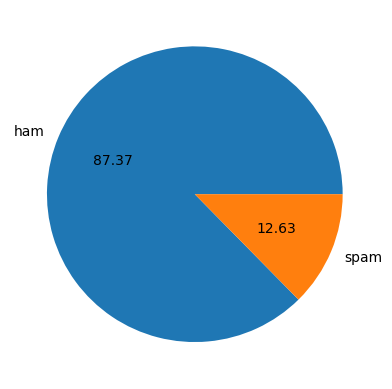

In [20]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

### Feature Engineering (Data is imbalance)

In [21]:
!pip install nltk

In [22]:
import nltk

- Creating a new column called `'num_char'` in the DataFrame `df`. The new column will show the number of characters in each string from the `'test'` column. It uses the `len()` function to count the characters in each string.

In [23]:
df['num_char'] = df['test'].apply(len)

In [24]:
df.head()

,target,test,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


- Creating a new column `'num_words'` in the DataFrame `df`. The new column will show the number of words in each string from the `'test'` column. It uses the `nltk.word_tokenize()` function to break the text into words, and then the `len()` function counts how many words are there.


In [25]:
df['num_words'] = df['test'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,test,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


- creating a new column `'num_sen'` in the DataFrame `df`. The new column will show the number of sentences in each string from the `'test'` column. It uses the `nltk.sent_tokenize()` function to break the text into sentences, and then the `len()`

In [27]:
df['num_sen'] = df['test'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,test,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df.describe()

,target,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


- Statistics for Ham vs. Spam Messages

In [30]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sen']].describe()

,num_char,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Creating histograms to compare the distribution of the number of characters (`'num_char'`) in "ham" and "spam" messages.

<Axes: xlabel='num_char', ylabel='Count'>

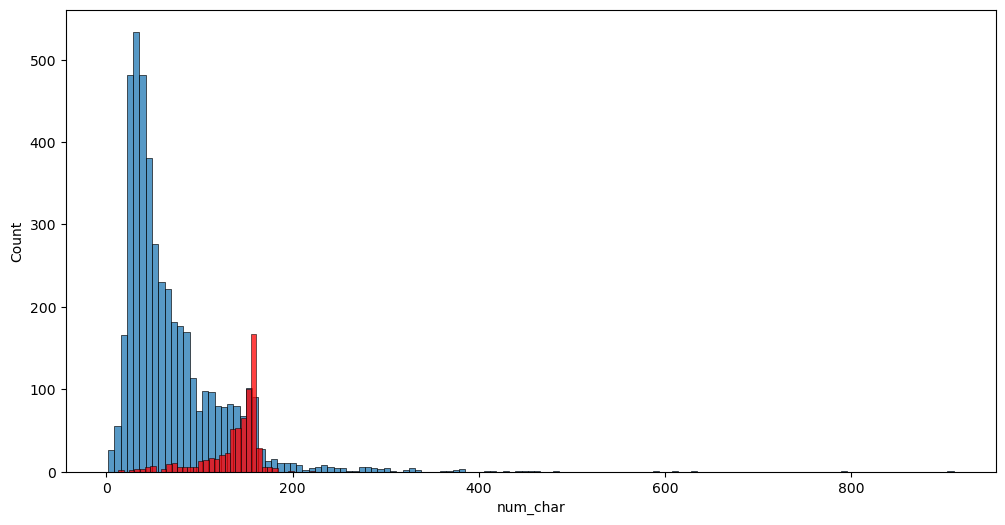

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

creating histograms to compare the distribution of the number of words (`'num_words'`) in "ham" and "spam" messages.


<Axes: xlabel='num_sen', ylabel='Count'>

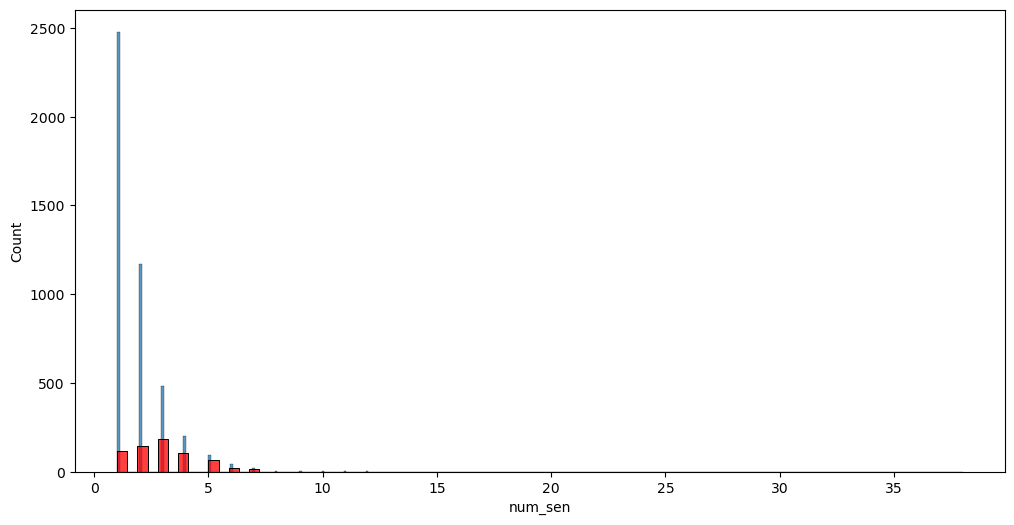

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sen'])
sns.histplot(df[df['target'] == 1]['num_sen'], color='red')

creating histograms to compare the distribution of the number of words (`'num_words'`) in "ham" and "spam" messages.

<Axes: xlabel='num_words', ylabel='Count'>

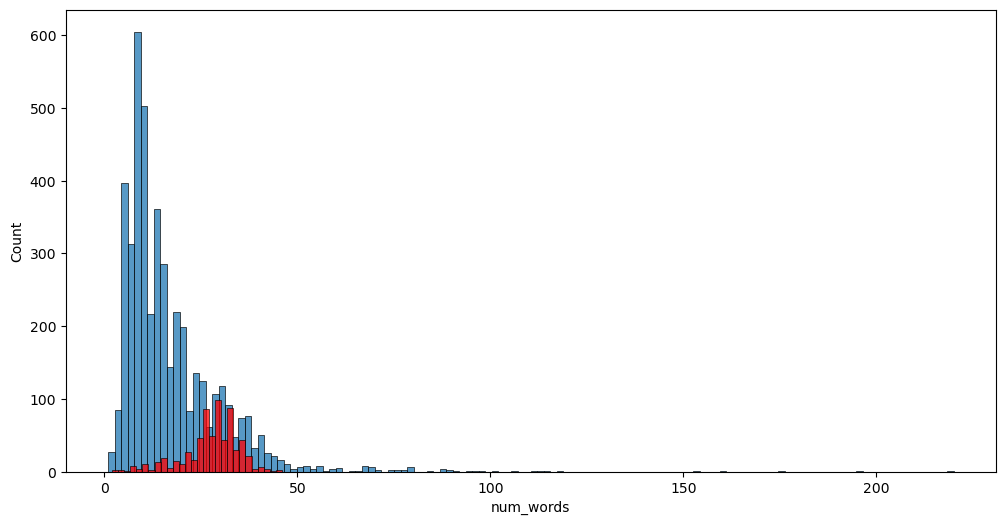

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

Generating a pairplot to visualize relationships between different numerical columns in the DataFrame `df`, with the data categorized by the `'target'` column (ham vs. spam).

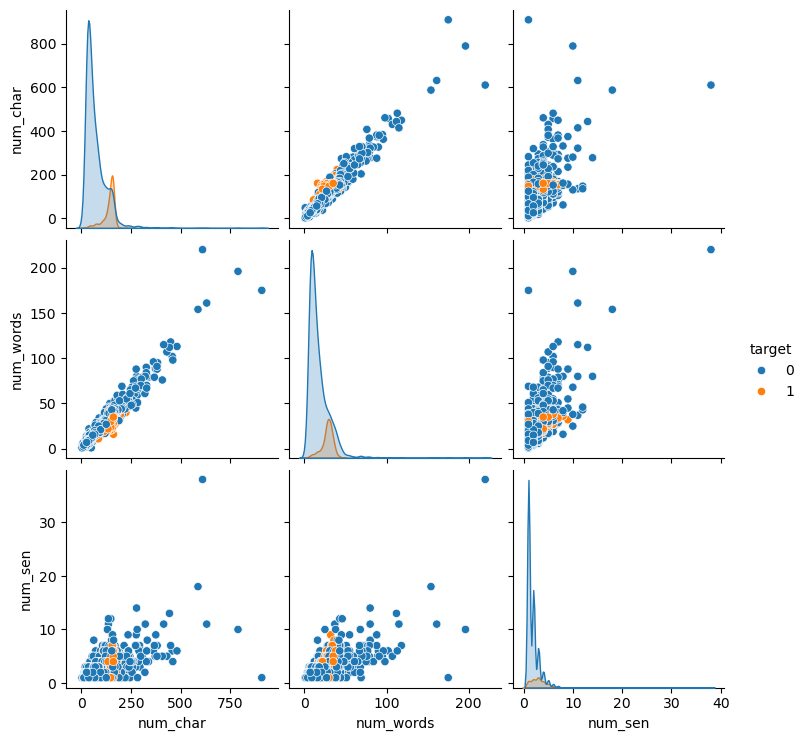

In [35]:
sns.pairplot(df,hue='target')

# Text preprocessing 
- lower case
- tokenization
- remove special characters
- remove spetwords and puctutions
- stemming 

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [38]:
from nltk.corpus import stopwords
import string

This function processes and cleans a given text by performing the following steps:

1. **Convert Text to Lowercase**:
   - `text = text.lower()`: Converts all the characters in the text to lowercase to ensure uniformity.

2. **Tokenize the Text**:
   - `text = nltk.word_tokenize(text)`: Breaks the text into individual words (tokens) using `nltk.word_tokenize()`.

3. **Remove Non-Alphanumeric Characters**:
   - The function loops through each word in `text` and appends only the alphanumeric words (those consisting of letters or numbers) to the list `y`.

4. **Remove Stopwords and Punctuation**:
   - `stopwords.words('english')`: Loads a list of common English stopwords (e.g., "and", "the", etc.) and removes these words from the text.
   - `string.punctuation`: Removes any punctuation from the text.

5. **Stemming the Words**:
   - The function uses a stemmer (assumed to be defined as `ps` outside the function) to reduce each word to its root form (e.g., "running" becomes "run").

6. **Return the Processed Text**:
   - `return " ".join(y)`: Joins the words back into a single string and returns the cleaned, processed text.


In [39]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
tranform_text('NLTK is a powerful library for processing natural language data!')

'nltk power librari process natur languag data'

Applying the `tranform_text` function to each entry in the `'test'` column of the DataFrame `df` and stores the cleaned and transformed text in a new column called `'transformed_text'`.


In [41]:
df['transformed_text'] = df['test'].apply(tranform_text)

In [42]:
df.head()

,target,test,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Generating a word cloud for "ham" (non-spam) messages in the DataFrame `df` using the `WordCloud` library.

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [44]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

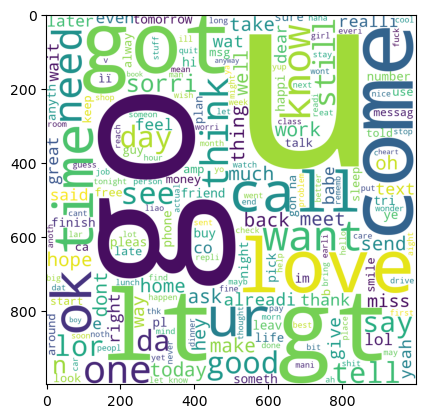

In [45]:
plt.imshow(ham_wc)

Generating a word cloud for "spam" messages in the DataFrame `df` using the `WordCloud` library.

In [46]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

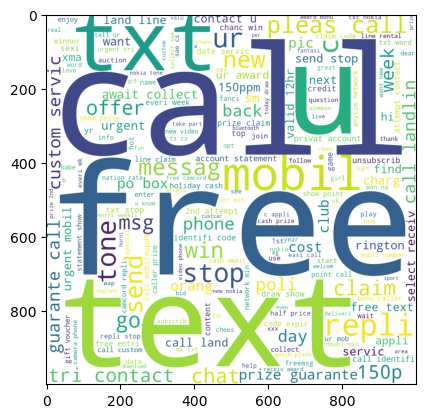

In [47]:
plt.imshow(spam_wc)

Generating a list of words (a corpus) for all "spam" messages in the DataFrame `df`.


In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

9939

Generating a bar plot of the 30 most common words in the `spam_corpus`, which contains words from spam messages.


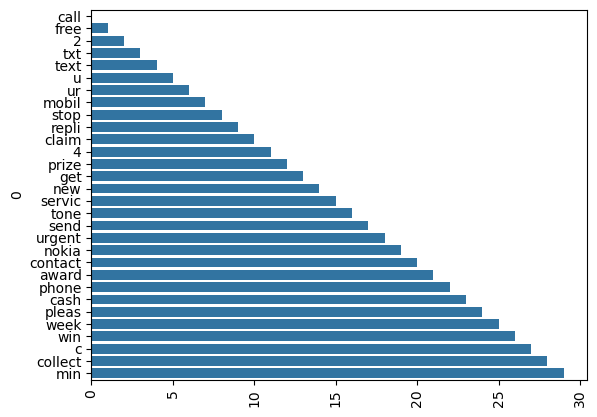

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

Generating a list of words (a corpus) for all "ham" messages in the DataFrame df.

In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

Generating a bar plot of the 30 most common words in the `ham_corpus`, which contains words from ham messages.

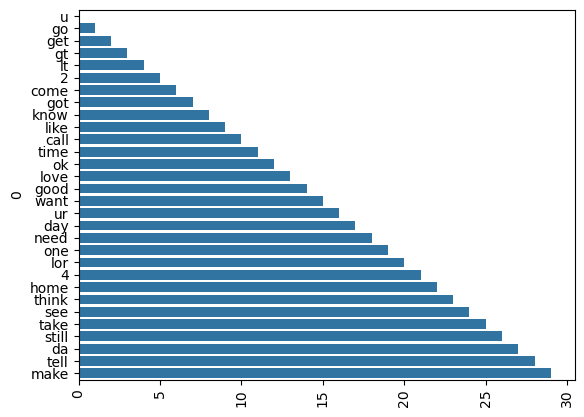

In [53]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

## 7. Model Building

### Data Preparation

#### Text Vectorization

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [56]:
X[100]

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
Y = df['target'].values

#### Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Model Selection & Training

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bmb = BernoulliNB()

- Gaussian Naive Bayes

In [62]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


- Multinomial Naive Bayes

In [63]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


- Bernoulli Naive Bayes

In [64]:
bmb.fit(X_train, y_train)
y_pred3 = bmb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### The Multinomial Naive Bayes (MNB) model is selected due to its 97.1% accuracy and 100% precision. This means that the model not only performs well in classifying both ham and spam messages, but also does so with perfect precision for the spam category (no false positives).

In [65]:
import pickle 

In [66]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

#### Test smaple email

In [67]:
sample_email = tranform_text("Congratulations! You've won a $1,000 gift card. Click the link below to claim your prize now. Hurry, this offer is valid for a limited time only!")

vectorized_email = tfidf.transform([sample_email]).toarray()  # Transforming to a vectorized form

prediction = bmb.predict(vectorized_email)


if prediction == 1:
    print("Spam")
else:
    print("Ham")

Spam


In [68]:
sample_email = tranform_text("U dun say so early hor... U c already then say...")

vectorized_email = tfidf.transform([sample_email]).toarray()  # Transforming to a vectorized form

prediction = bmb.predict(vectorized_email)


if prediction == 1:
    print("Spam")
else:
    print("Ham")

Ham
